# PCA in Python

Plotting the observations and divide them on the basis of the species (IRIS dataset)


In [30]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#we are not interested in iris column, hence, lets just pop it
y = data.pop('iris')
data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Lets scale the data

In [4]:
X = data.copy()

In [5]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
scaler = StandardScaler()

In [7]:
x = scaler.fit_transform(X)

In [8]:
x[:5, :5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### Applying PCA in Data

In [9]:
pca = PCA(random_state=42)

In [10]:
pca.fit(x)

PCA(random_state=42)

In [11]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [12]:
pca.explained_variance_ratio_ #this means 1st 2 features explain more than 95% of variance 

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [13]:
pca.explained_variance_

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

<BarContainer object of 4 artists>

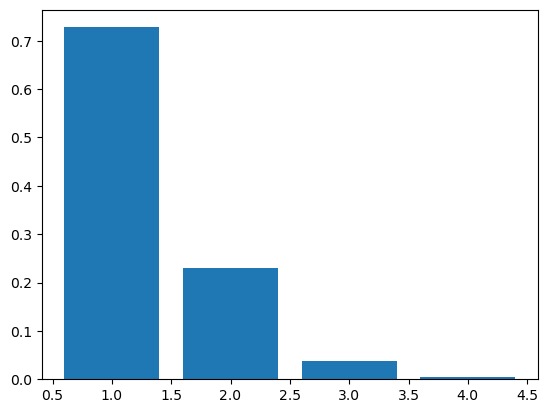

In [14]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

### Making scree plot

In [15]:
cummilative_sum = np.cumsum(pca.explained_variance_ratio_)

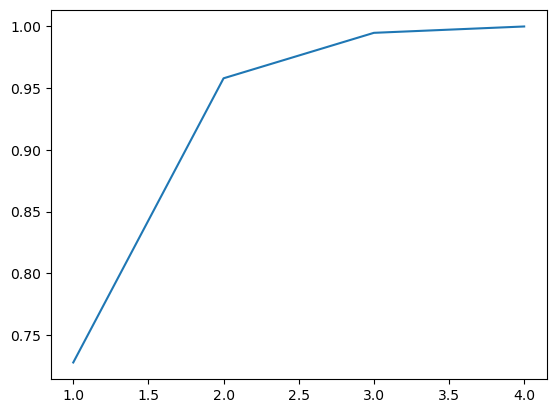

In [16]:
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), cummilative_sum)

### Hence, 1st two components explained more than 95% of varience in data

In [17]:
pc2 = PCA(n_components=2, random_state=42)


In [21]:
new_data =  pc2.fit_transform(x)

In [22]:
pc2.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [23]:
new_data.shape

(150, 2)

In [26]:
df = pd.DataFrame(data=new_data, columns=['pc1', 'pc2'])

In [27]:
df.head()

,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [28]:
df_final = pd.concat([df, y], axis=1)

In [29]:
df_final.head()

,pc1,pc2,iris
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


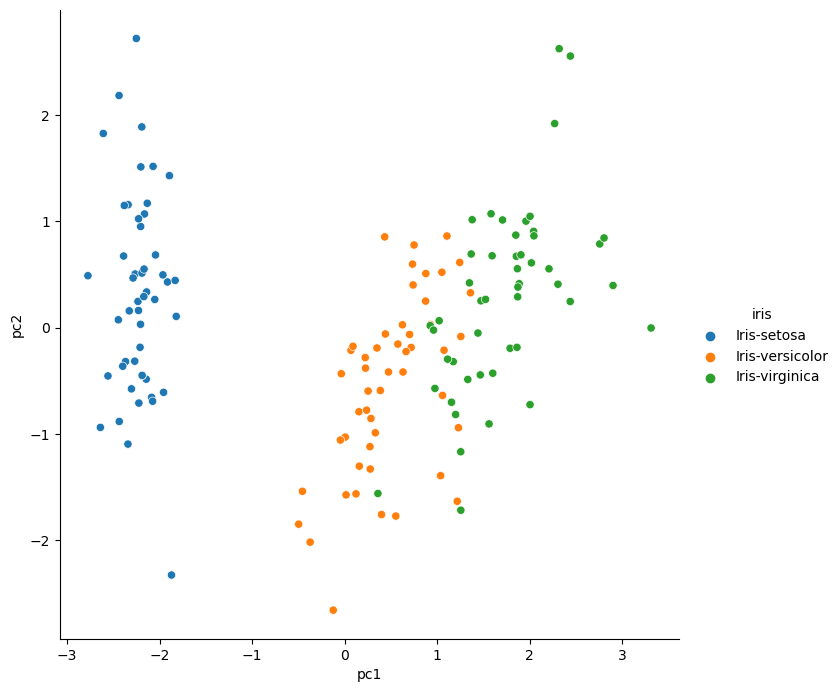

In [37]:
sns.pairplot(data=df_final, x_vars='pc1', y_vars='pc2', hue='iris', height=7)
plt.show()